In [51]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [52]:
data = pd.read_csv('train.csv')

In [53]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # to randomly shuffle data 

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [55]:
Y_train

array([1, 3, 8, ..., 9, 1, 7])

In [56]:
# Initilizing Parameters
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    
    return W1, b1, W2, b2

# Rectified Linear Unit (ReLU) Activation Function
# ReLU(x) = x , if x > 0 
#         = 0 , if x <= 0
def ReLU(Z):
    return np.maximum(Z, 0)

# Softmax Activation Function
# output layer ==> (e^(zi) / summation(e^(zj)))
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

# Forward Propogation
def forward_prop(W1, b1, W2, b2, X): # X is nothing but A0
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    
    return one_hot_Y

# derivative of ReLU activation Function g'(Z1)
def deriv_ReLU(Z):
    return Z > 0

# Backward Propogation
def backward_prop(Z1, A1, Z2, A2, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1    
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2    
    b2 = b2 - alpha * db2   
    
    return W1, b1, W2, b2
    

In [57]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
        
    return W1, b1, W2, b2

In [58]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 500, 0.1)

Iteration:  0
[6 9 4 ... 4 6 6] [1 3 8 ... 9 1 7]
0.08856097560975609
Iteration:  10
[3 9 3 ... 8 0 0] [1 3 8 ... 9 1 7]
0.13782926829268294
Iteration:  20
[3 9 3 ... 0 0 0] [1 3 8 ... 9 1 7]
0.2036341463414634
Iteration:  30
[3 9 1 ... 0 0 0] [1 3 8 ... 9 1 7]
0.25241463414634147
Iteration:  40
[3 9 1 ... 0 0 3] [1 3 8 ... 9 1 7]
0.290390243902439
Iteration:  50
[9 9 1 ... 0 0 3] [1 3 8 ... 9 1 7]
0.32565853658536587
Iteration:  60
[9 9 1 ... 0 9 3] [1 3 8 ... 9 1 7]
0.3634390243902439
Iteration:  70
[9 9 8 ... 0 1 3] [1 3 8 ... 9 1 7]
0.4037804878048781
Iteration:  80
[9 9 8 ... 0 1 3] [1 3 8 ... 9 1 7]
0.4414390243902439
Iteration:  90
[9 9 8 ... 0 1 3] [1 3 8 ... 9 1 7]
0.47709756097560974
Iteration:  100
[9 9 8 ... 2 1 3] [1 3 8 ... 9 1 7]
0.5083658536585366
Iteration:  110
[1 9 8 ... 2 1 3] [1 3 8 ... 9 1 7]
0.5355609756097561
Iteration:  120
[1 5 8 ... 8 1 3] [1 3 8 ... 9 1 7]
0.560829268292683
Iteration:  130
[1 5 8 ... 6 1 3] [1 3 8 ... 9 1 7]
0.5847317073170731
Iteration:  14

In [59]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [1]
Label:  1


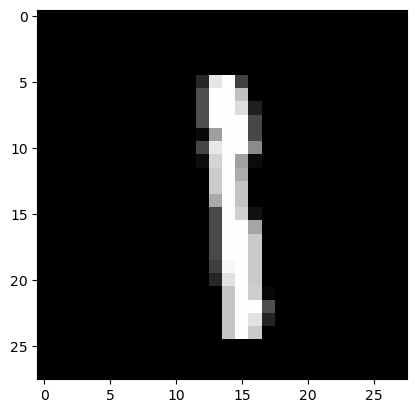

In [60]:
test_prediction(0, W1, b1, W2, b2)

Prediction:  [2]
Label:  2


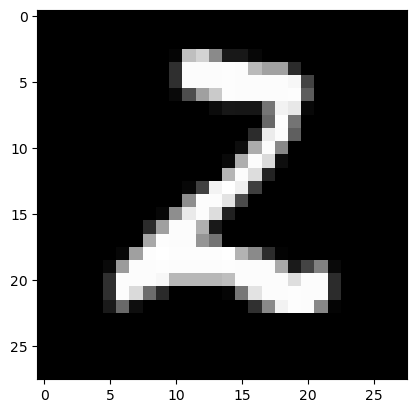

In [68]:
test_prediction(4, W1, b1, W2, b2)

Prediction:  [8]
Label:  8


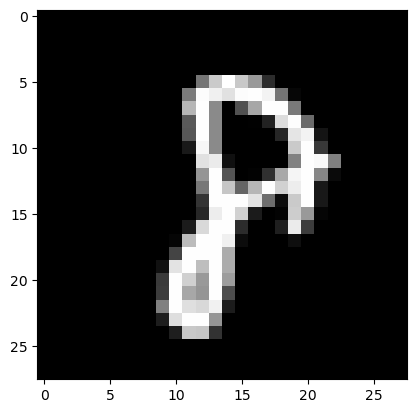

In [62]:
test_prediction(2, W1, b1, W2, b2)

Prediction:  [0]
Label:  0


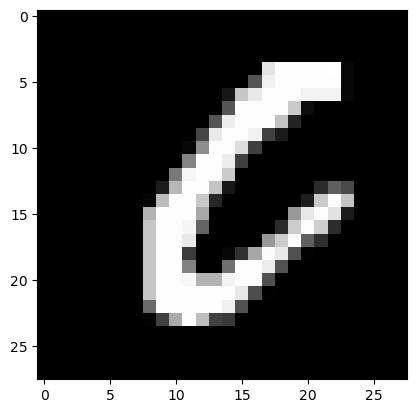

In [63]:
test_prediction(3, W1, b1, W2, b2)

In [64]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[6 1 4 9 9 5 6 4 8 6 6 4 4 9 1 8 2 3 3 0 9 2 8 1 4 1 1 8 3 1 5 5 5 3 9 7 9
 1 7 3 4 2 4 9 1 6 4 3 7 8 1 1 6 1 7 6 5 6 3 4 5 0 7 3 2 2 4 9 3 2 1 7 8 6
 4 0 0 1 9 0 0 4 3 8 0 2 7 4 0 7 6 1 7 3 0 2 1 0 0 3 9 6 5 3 3 9 3 9 3 6 2
 1 1 4 4 0 4 0 3 5 4 9 7 3 4 5 4 2 2 9 8 1 7 3 1 2 4 5 4 5 8 1 4 6 9 5 6 6
 7 7 7 3 1 6 7 3 6 0 8 1 5 2 3 9 7 3 2 1 4 0 7 1 0 7 8 4 5 9 6 4 8 1 4 2 8
 6 0 1 2 4 8 8 6 1 3 4 9 3 1 9 8 4 3 3 7 4 9 6 6 6 2 4 5 0 1 6 7 3 0 4 1 2
 2 7 7 8 3 9 5 0 5 6 4 4 7 6 5 0 7 0 6 6 7 9 2 4 4 0 6 0 7 1 6 3 3 9 7 6 4
 4 8 6 1 4 8 5 1 7 4 4 4 3 3 1 1 8 7 1 8 3 0 2 4 4 1 5 0 4 5 0 0 9 8 0 7 3
 4 5 5 5 8 6 3 9 0 8 7 4 8 0 7 7 0 3 1 3 0 4 8 8 4 8 9 0 4 3 0 1 2 6 9 0 6
 8 2 4 1 1 7 8 9 7 3 8 9 1 2 9 1 2 8 3 6 9 3 7 7 1 3 4 8 2 7 4 1 5 5 9 3 5
 1 4 2 7 5 6 6 6 4 3 3 0 2 6 6 4 6 7 3 7 0 7 0 4 1 8 3 4 2 0 0 3 6 2 5 8 0
 7 7 9 1 0 4 8 5 6 8 2 0 3 3 7 4 4 3 9 0 2 9 6 6 8 9 1 5 0 1 5 4 1 7 7 8 9
 2 6 4 6 1 1 1 3 6 9 4 6 0 5 5 0 0 2 4 7 8 4 8 8 0 2 7 8 6 3 2 6 1 8 6 1 0
 3 8 3 0 9 0 5 8 8 1 8 6 

np.float64(0.848)